In [ ]:
import numpy as np

def pca_from_scratch(X, n_components):
    
    # Mean Centering 
    X_meaned = X - np.mean(X, axis=0)
    
    # Compute covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)
    
    # Getting eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)
    
    return X_reduced, eigenvector_subset, sorted_eigenvalues[0:n_components]

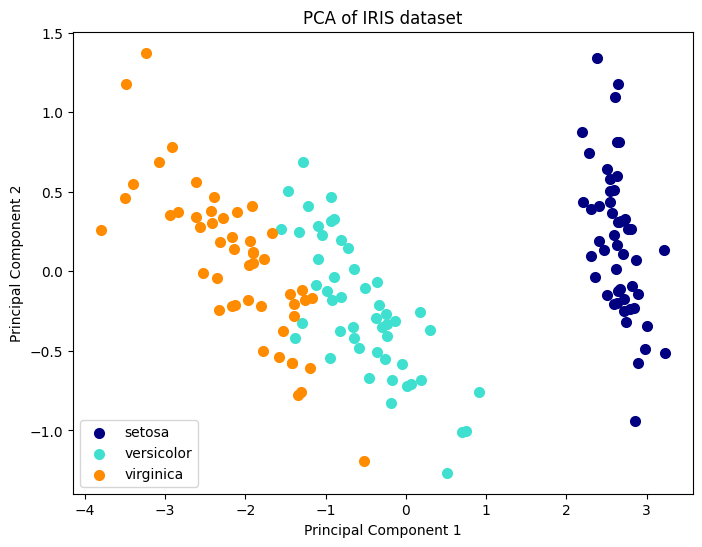

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA to reduce to 2 components
# pca = PCA(n_components=2)
# X_r = pca.fit_transform(X)

X_r, components, var = pca_from_scratch(X, 2)

# Plot the transformed data
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, lw=2, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()